In [0]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [35]:
trainData = pd.read_csv('train.csv')
trainData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [36]:
testData = pd.read_csv('test.csv')
testData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [0]:
trainData = trainData.drop('Id', axis=1)
testData = testData.drop('Id', axis=1)

In [0]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format='%m/%d/%Y')   
testData['Open Date'] = pd.to_datetime(testData['Open Date'], format='%m/%d/%Y')

trainData['OpenDays']=""
testData['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format='%m/%d/%Y')  
dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2015'],[len(testData)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format='%m/%d/%Y')  

trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
testData['OpenDays'] = dateLastTest['Date'] - testData['Open Date']

trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)
testData['OpenDays'] = testData['OpenDays'].astype('timedelta64[D]').astype(int)

trainData = trainData.drop('Open Date', axis=1)
testData = testData.drop('Open Date', axis=1)

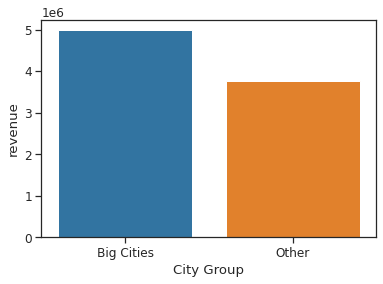

In [29]:
cityPerc = trainData[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()
sns.barplot(x='City Group', y='revenue', data=cityPerc)
plt.show()

citygroupDummy = pd.get_dummies(trainData['City Group'])
trainData = trainData.join(citygroupDummy)

citygroupDummyTest = pd.get_dummies(testData['City Group'])
testData = testData.join(citygroupDummyTest)

trainData = trainData.drop('City Group', axis=1)
testData = testData.drop('City Group', axis=1)



In [0]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
plt.show()

In [0]:
xTrain = pd.DataFrame({'OpenDays':trainData['OpenDays'].apply(numpy.log),'Big Cities':trainData['Big Cities'], 'Other':trainData['Other'],'P2':trainData['P2'], 'P8':trainData['P8'], 'P22':trainData['P22'],'P24':trainData['P24'], 'P28':trainData['P28'], 'P26':trainData['P26']})

yTrain = trainData['revenue'].apply(numpy.log)
xTest = pd.DataFrame({'OpenDays':testData['OpenDays'].apply(numpy.log),'Big Cities':testData['Big Cities'], 'Other':testData['Other'],'P2':testData['P2'], 'P8':testData['P8'], 'P22':testData['P22'],'P24':testData['P24'], 'P28':testData['P28'], 'P26':testData['P26']})

from sklearn import linear_model

cls = RandomForestRegressor(n_estimators=150)
cls.fit(xTrain, yTrain)
pred = cls.predict(xTest)
pred = numpy.exp(pred)
cls.score(xTrain, yTrain)

In [42]:
pred

array([3677145.39783868, 3208271.83855847, 2367222.22273717, ...,
       2779730.98865441, 2957381.56664751, 4904475.02852603])

In [0]:
testData = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('Final.csv',header=True, index=False)

In [25]:
final = pd.read_csv("Final.csv")
final

,Id,Prediction
0,0,3.677145e+06
1,1,3.208272e+06
2,2,2.367222e+06
3,3,2.941831e+06
4,4,3.647474e+06
...,...,...
99995,99995,5.888045e+06
99996,99996,2.849474e+06
99997,99997,2.779731e+06
99998,99998,2.957382e+06
